# Capstone Project for Coursera IBM Data Science Professional Certificate

### Install the geocoder library

In [2]:
!conda install -c conda-forge geocoder 
!conda install -c conda-forge geopy --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geocoder:   1.38.1-py_0  conda-forge
    orderedset: 2.0-py35_0   conda-forge
    ratelim:    0.1.6-py35_0 conda-forge

orderedset-2.0 100% |################################| Time: 0:00:00  48.44 MB/s
ratelim-0.1.6- 100% |################################| Time: 0:00:00  12.68 MB/s
geocoder-1.38. 100% |################################| Time: 0:00:00  43.99 MB/s


### install folium and import the libraries that are needed for the assignment

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes # install folium library for mapping

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  30.41 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  18.27 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  20.22 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  25.26 MB/s


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means for clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # map rendering library

print('All libraries imported')



All libraries imported


# Define all functions and parameters that will be used in this notebook

#### set my credentials for foursquare

In [3]:
# The code was removed by Watson Studio for sharing.

#### Define the function that will return venue information from foursquare

In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    LIMIT=300
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name + " " + str(lat) + " " + str(lng))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

This function will sort the venues in descending order

In [5]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Import libraries needed for accessing csv files from IBM storage. This cell also contains my IBM cloud credentials. These will be hidden during sharing to Github

In [6]:
# The code was removed by Watson Studio for sharing.

# Analysis for Baltimore, MD neighborhoods

### Import file with neighborhoods in Baltimore, MD. 

In [7]:

body = client_c9aa3a80e8314f1c91c6096da87c6720.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-wywkypk0trnoc4',Key='baltimore_neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_baltimore_neighborhoods = pd.read_csv(body)
df_baltimore_neighborhoods.head()



Neighborhood
0            Arlington
1            Ashburton
2    Burleigh-Leighton
3    Callaway-Garrison
4  Central Forest Park

In [8]:
#df_baltimore_neighborhoods.shape
df_baltimore_neighborhoods = df_baltimore_neighborhoods.head(100)
df_baltimore_neighborhoods.shape

(100, 1)

### Get the coordinates for baltimore neighborhoods

In [9]:
#lat_lng_coords = None 
latitude_lst = [] 
longitude_lst = []
neighborhood_lst = []

neighborhood_lst = df_baltimore_neighborhoods['Neighborhood'] 
geolocator = Nominatim(user_agent="bal_explorer")

for neighborhood in neighborhood_lst:
    address = neighborhood + ', Baltimore, MD'
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NA'
        longitude = 'NA'

    latitude_lst.append(latitude)
    longitude_lst.append(longitude)


df_baltimore_neighborhoods['Latitude']=latitude_lst
df_baltimore_neighborhoods['Longitude']=longitude_lst

df_baltimore_neighborhoods.head()


Neighborhood Latitude Longitude
0            Arlington  39.3487  -76.6827
1            Ashburton   39.328  -76.6711
2    Burleigh-Leighton       NA        NA
3    Callaway-Garrison  39.3322  -76.6794
4  Central Forest Park  39.3263  -76.6788

In [10]:
df_baltimore_neighborhoods.head(10)

Neighborhood Latitude Longitude
0             Arlington  39.3487  -76.6827
1             Ashburton   39.328  -76.6711
2     Burleigh-Leighton       NA        NA
3     Callaway-Garrison  39.3322  -76.6794
4   Central Forest Park  39.3263  -76.6788
5  Central Park Heights  39.3445  -76.6712
6             Cheswolde  39.3647  -76.6823
7         Cross Country   39.366  -76.6974
8              Dolfield  39.3377    -76.68
9            Dorchester  39.3321  -76.6864

### Eliminate neighborhoods that didn't return a latitude or longitude

In [11]:
df_baltimore_neighborhoods.drop(df_baltimore_neighborhoods[df_baltimore_neighborhoods.Latitude == 'NA'].index, inplace=True)
df_baltimore_neighborhoods.drop(df_baltimore_neighborhoods[df_baltimore_neighborhoods.Longitude == 'NA'].index, inplace=True)
df_baltimore_neighborhoods.head(10)


Neighborhood Latitude Longitude
0              Arlington  39.3487  -76.6827
1              Ashburton   39.328  -76.6711
3      Callaway-Garrison  39.3322  -76.6794
4    Central Forest Park  39.3263  -76.6788
5   Central Park Heights  39.3445  -76.6712
6              Cheswolde  39.3647  -76.6823
7          Cross Country   39.366  -76.6974
8               Dolfield  39.3377    -76.68
9             Dorchester  39.3321  -76.6864
10        East Arlington  39.3322  -76.6685

In [12]:
df_baltimore_neighborhoods.shape

(81, 3)

### call the getNearbyVenues function to obtain venues within the baltimore neighborhoods

In [13]:
baltimore_venues = getNearbyVenues(names=df_baltimore_neighborhoods['Neighborhood'],
                                   latitudes=df_baltimore_neighborhoods['Latitude'],
                                   longitudes=df_baltimore_neighborhoods['Longitude']
                                  )

baltimore_venues.head()

Arlington 39.3486919 -76.6826661
Ashburton 39.3279621 -76.6710811
Callaway-Garrison 39.3321612 -76.6794359
Central Forest Park 39.3263483 -76.6787513
Central Park Heights 39.3444594 -76.6712351
Cheswolde 39.3647395 -76.6822846
Cross Country 39.3660429 -76.6974161
Dolfield 39.3377299 -76.6800134
Dorchester 39.3321017 -76.6864432
East Arlington 39.3321696 -76.6684721
Fallstaff 39.3640343 -76.706985
Gwynn Oak 39.3269665 -76.7182361842866
Glen 39.3561004 -76.6879062
Hanlon Park – Longwood 39.3192666 -76.6673969706353
Howard Park 39.3313963 -76.7004684
Langston Hughes 39.3436936 -76.680523
Liberty Square 39.3222521 -76.6577302
Lucille Park 39.34023635 -76.6753636790463
Park Circle 39.3284213 -76.6600734
Park Heights 39.2364764 -76.6122048
Pimlico 39.3534806 -76.674604
Purnell 39.3199995 -76.7089812
Reisterstown Station 39.4695489 -76.8294213
West Forest Park 39.3206091 -76.6933178
Windsor Hills 39.3169578 -76.6859929
Woodmoor 39.3384396 -76.7330281
North 39.2908816 -76.610759
Abell 39.32613

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2              Pimlico Race Course       39.353124       -76.675279   
3                         7-Eleven       39.351952       -76.684550   
4             The Roost Lake Trout       39.345033       -76.685929   

                    Venue Category  
0             Caribbean Restaurant  
1               Chinese Restaurant  
2                        Racetrack  
3                Convenience Store  
4  Southern / Soul Food Restaurant

Explore the data returned. Identify how restaurants and grocery shops are categorized.

In [14]:
# explore data
baltimore_venues.shape
baltimore_venues.tail(20)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
3063  Christopher              39.285412              -76.603606   
3064  Christopher              39.285412              -76.603606   
3065  Christopher              39.285412              -76.603606   
3066  Christopher              39.285412              -76.603606   
3067  Christopher              39.285412              -76.603606   
3068  Christopher              39.285412              -76.603606   
3069  Christopher              39.285412              -76.603606   
3070  Christopher              39.285412              -76.603606   
3071  Christopher              39.285412              -76.603606   
3072  Christopher              39.285412              -76.603606   
3073  Christopher              39.285412              -76.603606   
3074  Christopher              39.285412              -76.603606   
3075  Christopher              39.285412              -76.603606   
3076  Christopher              39.285412              -76.603606   
3077  Christopher              39.285412              -76.603606   
3078  Christopher              39.285412              -76.603606   
3079  Christopher              39.285412              -76.603606   
3080  Christopher              39.285412              -76.603606   
3081  Christopher              39.285412              -76.603606   
3082  Christopher              39.285412              -76.603606   

                                                  Venue  Venue Latitude  \
3063                                           RA Sushi       39.282441   
3064                  Ruth's Chris Steak House - Pier 5       39.284689   
3065                        Da Mimmo Italian Restaurant       39.287034   
3066  Fairfield Inn & Suites Baltimore Downtown/Inne...       39.288152   
3067                      Sabatino's Italian Restaurant       39.286408   
3068                             The Cheesecake Factory       39.286089   
3069                                  Osteria Da Amedeo       39.286646   
3070                        Seven Foot Knoll Lighthouse       39.283780   
3071                         The Oceanaire Seafood Room       39.283020   
3072                                          Gift Shop       39.285516   
3073                                Cafe Gia Ristorante       39.285340   
3074                                  Federal Hill Park       39.280184   
3075                                       Sprint Store       39.287136   
3076                         Larry Flynt's Hustler Club       39.289615   
3077                             Potbelly Sandwich Shop       39.285439   
3078                  Gordon Biersch Brewery Restaurant       39.282535   
3079                                    Ceremony Coffee       39.280709   
3080                                           Madewell       39.283093   
3081                                       Nalley Fresh       39.286747   
3082                                             Ekiben       39.285599   

      Venue Longitude       Venue Category  
3063       -76.597477  Japanese Restaurant  
3064       -76.605436           Steakhouse  
3065       -76.602322   Italian Restaurant  
3066       -76.604316                Hotel  
3067       -76.601635   Italian Restaurant  
3068       -76.610108  American Restaurant  
3069       -76.600802                  Bar  
3070       -76.605315           Lighthouse  
3071       -76.601124   Seafood Restaurant  
3072       -76.608379            Gift Shop  
3073       -76.601380   Italian Restaurant  
3074       -76.609198                 Park  
3075       -76.606056    Mobile Phone Shop  
3076       -76.609833           Strip Club  
3077       -76.607242       Sandwich Place  
3078       -76.599573              Brewery  
3079       -76.598403          Coffee Shop  
3080       -76.600650        Women's Store  
3081       -76.609624          Salad Place  
3082       -76.594547     Asian Restaurant

Select records of restaurants and grocery shops.

In [15]:
# select restaurants and grocery shops.
baltimore_data = baltimore_venues[baltimore_venues['Venue Category'].str.contains('Market|Restaurant|Pizza|Food|Sandwich', na=False, regex=True)].reset_index(drop=True)
baltimore_data.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2             The Roost Lake Trout       39.345033       -76.685929   
3                           Subway       39.347048       -76.688561   
4                     Citgo/Subway       39.348421       -76.691754   

                    Venue Category  
0             Caribbean Restaurant  
1               Chinese Restaurant  
2  Southern / Soul Food Restaurant  
3                   Sandwich Place  
4                   Sandwich Place

In [16]:
baltimore_data.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   
5    Arlington              39.348692              -76.682666   
6    Arlington              39.348692              -76.682666   
7    Arlington              39.348692              -76.682666   
8    Arlington              39.348692              -76.682666   
9    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2             The Roost Lake Trout       39.345033       -76.685929   
3                           Subway       39.347048       -76.688561   
4                     Citgo/Subway       39.348421       -76.691754   
5             Little Caesars Pizza       39.347042       -76.688801   
6              West Indian Flavour       39.350411       -76.681060   
7                Marvins Crabhouse       39.349670       -76.678754   
8           Royal Maroon Carry Out       39.349371       -76.675245   
9           Best Chinese Carry Out       39.347693       -76.690354   

                    Venue Category  
0             Caribbean Restaurant  
1               Chinese Restaurant  
2  Southern / Soul Food Restaurant  
3                   Sandwich Place  
4                   Sandwich Place  
5                      Pizza Place  
6             Caribbean Restaurant  
7               Seafood Restaurant  
8             Fast Food Restaurant  
9               Chinese Restaurant

In [17]:
baltimore_data.shape

(879, 7)

Lets remove duplicates from the records. 

In [18]:
#drop duplicates venues if they exist in the data set. This is because some of the neighborhoods are really close and venues may overlap.
baltimore_data_unique = baltimore_data.drop_duplicates()
baltimore_data_unique.shape


(879, 7)

In [19]:
baltimore_data_unique.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   
5    Arlington              39.348692              -76.682666   
6    Arlington              39.348692              -76.682666   
7    Arlington              39.348692              -76.682666   
8    Arlington              39.348692              -76.682666   
9    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2             The Roost Lake Trout       39.345033       -76.685929   
3                           Subway       39.347048       -76.688561   
4                     Citgo/Subway       39.348421       -76.691754   
5             Little Caesars Pizza       39.347042       -76.688801   
6              West Indian Flavour       39.350411       -76.681060   
7                Marvins Crabhouse       39.349670       -76.678754   
8           Royal Maroon Carry Out       39.349371       -76.675245   
9           Best Chinese Carry Out       39.347693       -76.690354   

                    Venue Category  
0             Caribbean Restaurant  
1               Chinese Restaurant  
2  Southern / Soul Food Restaurant  
3                   Sandwich Place  
4                   Sandwich Place  
5                      Pizza Place  
6             Caribbean Restaurant  
7               Seafood Restaurant  
8             Fast Food Restaurant  
9               Chinese Restaurant

In [20]:
#check how many venues were returned for each neighborhood
baltimore_data_unique.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                  
Abell                                     27                      27     27   
Arcadia                                    8                       8      8   
Arlington                                 11                      11     11   
Armistead Gardens                          3                       3      3   
Ashburton                                  5                       5      5   
Barclay                                   23                      23     23   
Belair-Edison                              6                       6      6   
Belair-Parkside                            4                       4      4   
Beverly Hills                              6                       6      6   
Callaway-Garrison                          6                       6      6   
Cameron Village                            8                       8      8   
Cedarcroft                                18                      18     18   
Cedmont                                    5                       5      5   
Cedonia                                    2                       2      2   
Central Forest Park                        3                       3      3   
Central Park Heights                       8                       8      8   
Charles North                             33                      33     33   
Charles Village                           35                      35     35   
Christopher                               38                      38     38   
Cold Spring                                3                       3      3   
Cross Country                              1                       1      1   
Cylburn                                    4                       4      4   
Dolfield                                   5                       5      5   
Dorchester                                 3                       3      3   
East Arlington                             8                       8      8   
Evergreen                                  7                       7      7   
Fallstaff                                 15                      15     15   
Glen                                       3                       3      3   
Glen Oaks                                  2                       2      2   
Govans                                    13                      13     13   
...                                      ...                     ...    ...   
Lucille Park                               7                       7      7   
Medfield                                   7                       7      7   
Mid-Charles                               41                      41     41   
Mid-Govans                                13                      13     13   
Mount Washington                           3                       3      3   
North                                     27                      27     27   
Northeast                                 27                      27     27   
Oakenshawe                                26                      26     26   
Old Goucher                               31                      31     31   
Park Circle                                2                       2      2   
Park Heights                               9                       9      9   
Pen Lucy                                   2                       2      2   
Pimlico                                    4                       4      4   
Purnell                                    1                       1      1   
Radnor-Winston                             3                       3      3   
Reisterstown Station                       6                       6      6   
Remington                                 37                      37     37   
Roland Park                                7                       7     

In [21]:
#how many unique categories exist in our data set
print('There are {} uniques categories.'.format(len(baltimore_venues['Venue Category'].unique())))

There are 249 uniques categories.


In [22]:
# create map of Baltimore using latitude and longitude values
bal_latitude = 39.299236
bal_longitude = -76.609383

map_baltimore = folium.Map(location=[bal_latitude, bal_longitude], zoom_start=12)

# add Baltimore as a red circle mark
folium.features.CircleMarker(
[bal_latitude, bal_longitude],
radius=10,
popup='Baltimore',
fill=True,
color='red',
fill_color='red',
fill_opacity=0.6
).add_to(map_baltimore)


# add restaurants, grocery and eating places to the map as blue circle markers
for lat, lng, label in zip(baltimore_data_unique['Venue Latitude'], baltimore_data_unique['Venue Longitude'], baltimore_data_unique['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(map_baltimore)

# display map
map_baltimore

# K-means clustering for Baltimore, MD neighborhoods

Create dummy variables for k-means clustering

In [23]:
# one hot encoding
baltimore_onehot = pd.get_dummies(baltimore_data_unique[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
baltimore_onehot['Neighborhood'] = baltimore_data_unique['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [baltimore_onehot.columns[-1]] + list(baltimore_onehot.columns[:-1])
baltimore_onehot = baltimore_onehot[fixed_columns]

baltimore_onehot.head()


Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0    Arlington                  0                   0                    0   
1    Arlington                  0                   0                    0   
2    Arlington                  0                   0                    0   
3    Arlington                  0                   0                    0   
4    Arlington                  0                   0                    0   

   Arepa Restaurant  Asian Restaurant  Cajun / Creole Restaurant  \
0                 0                 0                          0   
1                 0                 0                          0   
2                 0                 0                          0   
3                 0                 0                          0   
4                 0                 0                          0   

   Caribbean Restaurant  Chinese Restaurant  Ethiopian Restaurant  \
0                     1                   0                     0   
1                     0                   1                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

           ...            Restaurant  Sandwich Place  Seafood Restaurant  \
0          ...                     0               0                   0   
1          ...                     0               0                   0   
2          ...                     0               0                   0   
3          ...                     0               1                   0   
4          ...                     0               1                   0   

   Southern / Soul Food Restaurant  Spanish Restaurant  Sushi Restaurant  \
0                                0                   0                 0   
1                                0                   0                 0   
2                                1                   0                 0   
3                                0                   0                 0   
4                                0                   0                 0   

   Tapas Restaurant  Thai Restaurant  Vegetarian / Vegan Restaurant  \
0                 0                0                              0   
1                 0                0                              0   
2                 0                0                              0   
3                 0                0                              0   
4                 0                0                              0   

   Vietnamese Restaurant  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 45 columns]

In [24]:
baltimore_onehot.shape

(879, 45)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [25]:
baltimore_grouped = baltimore_onehot.groupby('Neighborhood').mean().reset_index()
baltimore_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0                   Abell            0.00000            0.000000   
1                 Arcadia            0.00000            0.000000   
2               Arlington            0.00000            0.000000   
3       Armistead Gardens            0.00000            0.000000   
4               Ashburton            0.00000            0.000000   
5                 Barclay            0.00000            0.000000   
6           Belair-Edison            0.00000            0.000000   
7         Belair-Parkside            0.00000            0.000000   
8           Beverly Hills            0.00000            0.000000   
9       Callaway-Garrison            0.00000            0.000000   
10        Cameron Village            0.00000            0.000000   
11             Cedarcroft            0.00000            0.000000   
12                Cedmont            0.00000            0.000000   
13                Cedonia            0.00000            0.000000   
14    Central Forest Park            0.00000            0.000000   
15   Central Park Heights            0.00000            0.000000   
16          Charles North            0.00000            0.000000   
17        Charles Village            0.00000            0.000000   
18            Christopher            0.00000            0.000000   
19            Cold Spring            0.00000            0.000000   
20          Cross Country            0.00000            0.000000   
21                Cylburn            0.00000            0.000000   
22               Dolfield            0.00000            0.000000   
23             Dorchester            0.00000            0.000000   
24         East Arlington            0.00000            0.000000   
25              Evergreen            0.00000            0.000000   
26              Fallstaff            0.00000            0.000000   
27                   Glen            0.00000            0.000000   
28              Glen Oaks            0.00000            0.000000   
29                Govans             0.00000            0.000000   
..                    ...                ...                 ...   
47           Lucille Park            0.00000            0.000000   
48               Medfield            0.00000            0.000000   
49            Mid-Charles            0.02439            0.000000   
50             Mid-Govans            0.00000            0.000000   
51       Mount Washington            0.00000            0.000000   
52                  North            0.00000            0.000000   
53              Northeast            0.00000            0.000000   
54             Oakenshawe            0.00000            0.000000   
55            Old Goucher            0.00000            0.000000   
56            Park Circle            0.00000            0.000000   
57           Park Heights            0.00000            0.000000   
58               Pen Lucy            0.00000            0.000000   
59                Pimlico            0.00000            0.000000   
60                Purnell            0.00000            0.000000   
61         Radnor-Winston            0.00000            0.000000   
62   Reisterstown Station            0.00000            0.000000   
63              Remington            0.00000            0.000000   
64            Roland Park            0.00000            0.000000   
65              Rosebank             0.00000            0.000000   
66           The Orchards            0.00000            0.000000   
67  Village of Cross Keys            0.00000            0.000000   
68                Waverly            0.00000            0.000000   
69            Wilson Park            0.00000            0.000000   
70         Winston-Govans            0.00000            0.000000   
71              Woodberry            0.00000            0.000000   
72     Woodbourne Heights            0.00000            0.000000   
73      Woodbourne-McCabe            0.00000            0.142857   
7

Create a new dataframe, and use the function above to sort the top 10 venues and save them in the new dataframe

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
baltimore_venues_sorted = pd.DataFrame(columns=columns)
baltimore_venues_sorted['Neighborhood'] = baltimore_grouped['Neighborhood']

for ind in np.arange(baltimore_grouped.shape[0]):
    baltimore_venues_sorted.iloc[ind, 1:] = return_most_common_venues(baltimore_grouped.iloc[ind, :], num_top_venues)

baltimore_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0              Abell           Pizza Place        Sandwich Place   
1            Arcadia           Pizza Place        Farmers Market   
2          Arlington  Fast Food Restaurant        Sandwich Place   
3  Armistead Gardens    Seafood Restaurant        Sandwich Place   
4          Ashburton    Chinese Restaurant           Pizza Place   

             3rd Most Common Venue 4th Most Common Venue  \
0  Southern / Soul Food Restaurant   American Restaurant   
1    Vegetarian / Vegan Restaurant    Seafood Restaurant   
2             Caribbean Restaurant    Chinese Restaurant   
3            Vietnamese Restaurant  Fast Food Restaurant   
4                           Market                  Food   

   5th Most Common Venue            6th Most Common Venue  \
0     Chinese Restaurant                Korean Restaurant   
1     Chinese Restaurant          New American Restaurant   
2            Pizza Place  Southern / Soul Food Restaurant   
3      Indian Restaurant                 Greek Restaurant   
4  Vietnamese Restaurant                Indian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Food Truck     Food & Drink Shop    Mexican Restaurant   
1           Fish Market      Greek Restaurant     French Restaurant   
2    Seafood Restaurant      Greek Restaurant     French Restaurant   
3     French Restaurant            Food Truck            Food Court   
4      Greek Restaurant     French Restaurant            Food Truck   

  10th Most Common Venue  
0         Farmers Market  
1             Food Truck  
2             Food Truck  
3      Food & Drink Shop  
4             Food Court

Lets attempt to identify the optimum k

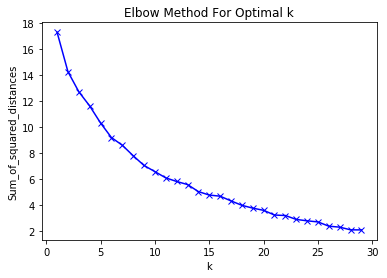

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

baltimore_grouped_clustering = baltimore_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(baltimore_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Cluster the Neighborhoods
We can see from the graph above that the clustering doesn't exhibit a distinct elbow to determine the optimum K. However, after 8 clusters, the decrease in within-cluster sum of squared distances (inertia for k-means) decreases signficantly. While the inertia will keep decreasing as we increase the number of clusters, the change in inertia gets smaller after 8 clusters. We will thus use 8 as the optimum number of clusters in order to understand broad themes within the data.

In [33]:
baltimore_grouped_clustering.head()

Afghan Restaurant  African Restaurant  American Restaurant  \
0                0.0                 0.0             0.074074   
1                0.0                 0.0             0.000000   
2                0.0                 0.0             0.000000   
3                0.0                 0.0             0.000000   
4                0.0                 0.0             0.000000   

   Arepa Restaurant  Asian Restaurant  Cajun / Creole Restaurant  \
0               0.0               0.0                        0.0   
1               0.0               0.0                        0.0   
2               0.0               0.0                        0.0   
3               0.0               0.0                        0.0   
4               0.0               0.0                        0.0   

   Caribbean Restaurant  Chinese Restaurant  Ethiopian Restaurant  \
0              0.037037            0.037037                   0.0   
1              0.000000            0.000000                   0.0   
2              0.250000            0.166667                   0.0   
3              0.000000            0.000000                   0.0   
4              0.000000            0.400000                   0.0   

   Farmers Market          ...            Restaurant  Sandwich Place  \
0        0.037037          ...                   0.0        0.148148   
1        0.285714          ...                   0.0        0.000000   
2        0.000000          ...                   0.0        0.166667   
3        0.000000          ...                   0.0        0.333333   
4        0.000000          ...                   0.0        0.000000   

   Seafood Restaurant  Southern / Soul Food Restaurant  Spanish Restaurant  \
0            0.037037                         0.111111                 0.0   
1            0.142857                         0.000000                 0.0   
2            0.083333                         0.083333                 0.0   
3            0.666667                         0.000000                 0.0   
4            0.000000                         0.000000                 0.0   

   Sushi Restaurant  Tapas Restaurant  Thai Restaurant  \
0          0.037037               0.0         0.037037   
1          0.000000               0.0         0.000000   
2          0.000000               0.0         0.000000   
3          0.000000               0.0         0.000000   
4          0.000000               0.0         0.000000   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  
0                       0.000000                    0.0  
1                       0.142857                    0.0  
2                       0.000000                    0.0  
3                       0.000000                    0.0  
4                       0.000000                    0.0  

[5 rows x 45 columns]

In [29]:
# set number of clusters
kclusters = 8

#baltimore_grouped_clustering = baltimore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(baltimore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:8] 

array([6, 6, 1, 3, 4, 6, 6, 7], dtype=int32)

Create a new dataframe containing the clusters labels and also the 10 most commone venues

In [30]:
# add clustering labels
baltimore_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#baltimore_merged = df_baltimore_neighborhoods

# merge data to add latitude/longitude for each neighborhood
baltimore_merged = df_baltimore_neighborhoods.join(baltimore_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

baltimore_merged.head()

Neighborhood Latitude Longitude  Cluster Labels  \
0             Arlington  39.3487  -76.6827             1.0   
1             Ashburton   39.328  -76.6711             4.0   
3     Callaway-Garrison  39.3322  -76.6794             4.0   
4   Central Forest Park  39.3263  -76.6788             7.0   
5  Central Park Heights  39.3445  -76.6712             4.0   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0  Fast Food Restaurant        Sandwich Place   Caribbean Restaurant   
1    Chinese Restaurant           Pizza Place                 Market   
3    Chinese Restaurant           Pizza Place                 Market   
4    Chinese Restaurant                Market  Vietnamese Restaurant   
5  Fast Food Restaurant           Fish Market                 Market   

  4th Most Common Venue  5th Most Common Venue  \
0    Chinese Restaurant            Pizza Place   
1                  Food  Vietnamese Restaurant   
3                  Food  Vietnamese Restaurant   
4           Fish Market      Indian Restaurant   
5    Seafood Restaurant   Caribbean Restaurant   

             6th Most Common Venue 7th Most Common Venue  \
0  Southern / Soul Food Restaurant    Seafood Restaurant   
1                Indian Restaurant      Greek Restaurant   
3                Indian Restaurant      Greek Restaurant   
4                 Greek Restaurant     French Restaurant   
5               Chinese Restaurant           Pizza Place   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0       Greek Restaurant     French Restaurant             Food Truck  
1      French Restaurant            Food Truck             Food Court  
3      French Restaurant            Food Truck             Food Court  
4             Food Truck            Food Court      Food & Drink Shop  
5  Vietnamese Restaurant      Greek Restaurant      French Restaurant

In [36]:
baltimore_merged.shape

(81, 14)

In [31]:
#identify neighborhoods that didn't return any restaurants or grocery shops and eliminate them from the data
baltimore_merged_na = baltimore_merged[baltimore_merged.isna().any(axis=1)]
baltimore_merged_na



Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
6          Cheswolde  39.3647  -76.6823             NaN                   NaN   
17       Howard Park  39.3314  -76.7005             NaN                   NaN   
29  West Forest Park  39.3206  -76.6933             NaN                   NaN   
30     Windsor Hills   39.317   -76.686             NaN                   NaN   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6                    NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
29                   NaN                   NaN                   NaN   
30                   NaN                   NaN                   NaN   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6                    NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
29                   NaN                   NaN                   NaN   
30                   NaN                   NaN                   NaN   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6                    NaN                   NaN                    NaN  
17                   NaN                   NaN                    NaN  
29                   NaN                   NaN                    NaN  
30                   NaN                   NaN                    NaN

In [32]:
baltimore_merged.dropna(inplace=True)
baltimore_merged.shape

(77, 14)

Create a new map showing the clusters in color.

In [34]:
# create map
bal_clusters = folium.Map(location=[bal_latitude, bal_longitude], zoom_start=12)
#print(bal_latitude)
#print(bal_longitude)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(baltimore_merged['Latitude'], baltimore_merged['Longitude'], baltimore_merged['Neighborhood'], baltimore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(bal_clusters)
       
bal_clusters

## Examine the clusters created


#### Cluster 0:
This cluster identifies neighborhoods that have fewer immigrants. The two most common restaurants are American. However, there are also a number of Vietnamese, Indian, Greek and French restaurants. These neighborhoods are Cold Spring, Cylburn, Levindale and Mount Washington.

In [50]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 0, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
42       Cold Spring  39.3492  -76.6558             0.0   American Restaurant   
44           Cylburn   39.348  -76.6642             0.0  Fast Food Restaurant   
61         Levindale  39.3531  -76.6644             0.0            Food Truck   
65  Mount Washington  39.3611  -76.6632             0.0            Food Truck   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
42            Food Truck         Sandwich Place  Vietnamese Restaurant   
44                Market             Food Truck         Sandwich Place   
61        Sandwich Place  Vietnamese Restaurant   Fast Food Restaurant   
65        Sandwich Place  Vietnamese Restaurant   Fast Food Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
42            Fish Market     Indian Restaurant      Greek Restaurant   
44  Vietnamese Restaurant      Greek Restaurant     French Restaurant   
61      Indian Restaurant      Greek Restaurant     French Restaurant   
65      Indian Restaurant      Greek Restaurant     French Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
42     French Restaurant          Food Service             Food Court  
44          Food Service            Food Court      Food & Drink Shop  
61          Food Service            Food Court      Food & Drink Shop  
65          Food Service            Food Court      Food & Drink Shop

#### Cluster 1:
This cluster identifies neighborhoods that are very diverse in nature. These are cosmopolitan neighborhoods where most immigrants will find a home and feel comfortable. 

In [51]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 1, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
11              Fallstaff   39.364   -76.707             1.0   
19         Liberty Square  39.3223  -76.6577             1.0   
23           Park Heights  39.2365  -76.6122             1.0   
26   Reisterstown Station  39.4695  -76.8294             1.0   
31               Woodmoor  39.3384   -76.733             1.0   
32                  North  39.2909  -76.6108             1.0   
33                  Abell  39.3261  -76.6117             1.0   
36                Barclay   39.315  -76.6122             1.0   
37        Cameron Village  39.3567  -76.5993             1.0   
38             Cedarcroft  39.3702  -76.6128             1.0   
39          Charles North   39.311  -76.6164             1.0   
40        Charles Village  39.3217  -76.6168             1.0   
43  Village of Cross Keys  39.3559  -76.6466             1.0   
46              Evergreen  39.3463   -76.629             1.0   
47                Govans   39.3588  -76.6062             1.0   
50               Guilford  39.3396  -76.6144             1.0   
51                Hampden  39.3309   -76.635             1.0   
52                Harwood   39.321  -76.6113             1.0   
53           Hoes Heights  39.3409  -76.6374             1.0   
54               Homeland  39.3599  -76.6199             1.0   
58                Keswick  39.3397  -76.6297             1.0   
59           Lake Evesham  39.3651  -76.6058             1.0   
60            Lake Walker    39.37  -76.6036             1.0   
63            Mid-Charles  39.3013  -76.6156             1.0   
64             Mid-Govans  39.3588  -76.6062             1.0   
66               Medfield  39.3403  -76.6429             1.0   
68             Oakenshawe  39.3305  -76.6127             1.0   
69            Old Goucher  39.3161  -76.6174             1.0   
70           The Orchards  39.2909  -76.6108             1.0   
73              Remington  39.3208  -76.6226             1.0   
75            Roland Park  39.3497  -76.6357             1.0   
76              Rosebank   39.2909  -76.6108             1.0   
82                Waverly  39.3303  -76.6064             1.0   
85              Woodberry  39.3312  -76.6434             1.0   
86     Woodbourne Heights  39.3574  -76.5923             1.0   
87      Woodbourne-McCabe  39.3537  -76.6061             1.0   
88             Wyman Park  39.3335  -76.6264             1.0   
89              Wyndhurst  39.3559  -76.6314             1.0   
90              Northeast  39.2909  -76.6108             1.0   
91                Arcadia  39.3341  -76.5665             1.0   
95          Beverly Hills  39.3403  -76.5695             1.0   
98            Christopher  39.2854  -76.6036             1.0   

   1st Most Common Venue            2nd Most Common Venue  \
11  Fast Food Restaurant              American Restaurant   
19   American Restaurant                      Pizza Place   
23  Fast Food Restaurant                      Pizza Place   
26    Italian Restaurant                      Pizza Place   
31   American Restaurant                   Sandwich Place   
32   American Restaurant                      Pizza Place   
33           Pizza Place                   Sandwich Place   
36     Korean Restaurant              American Restaurant   
37        Sandwich Place               Chinese Restaurant   
38           Pizza Place                   Sandwich Place   
39     Korean Restaurant  Southern / Soul Food Restaurant   
40        Sandwich Place                      Pizza Place   
43     Indian Restaurant              American Restaurant   
46           Pizza Place              American Restaurant   
47        Sandwich Place                      Pizza Place   
50           Pizza Place                       Restaurant   
51    Italian Restaurant              American Restaurant   
52           Pizza Place                   Sandwich Place   
53   American Restaurant                      Pizza Place   
54           Pizza Place             Fas

#### Cluster 2:
Neighborhoods in cluster 2 are somewhat diverse, but it is evident that this neighborhood is home to more people of African descent and from the Carribean. While most immigrants will be welcomed here, immigrants from central america/carribean island will be happy to find a home here. 

In [52]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 2, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
0              Arlington  39.3487  -76.6827             2.0   
5   Central Park Heights  39.3445  -76.6712             2.0   
13             Gwynn Oak   39.327  -76.7182             2.0   
14                  Glen  39.3561  -76.6879             2.0   
18       Langston Hughes  39.3437  -76.6805             2.0   
24               Pimlico  39.3535  -76.6746             2.0   

   1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0   Caribbean Restaurant  Fast Food Restaurant         Sandwich Place   
5   Fast Food Restaurant           Pizza Place            Fish Market   
13  Caribbean Restaurant    Chinese Restaurant  Vietnamese Restaurant   
14  Caribbean Restaurant        Sandwich Place     Chinese Restaurant   
18  Caribbean Restaurant           Pizza Place     Chinese Restaurant   
24  Caribbean Restaurant    Seafood Restaurant   Fast Food Restaurant   

    4th Most Common Venue 5th Most Common Venue  \
0      Chinese Restaurant           Pizza Place   
5                  Market    Seafood Restaurant   
13            Fish Market     Indian Restaurant   
14  Vietnamese Restaurant           Fish Market   
18   Fast Food Restaurant                Market   
24  Vietnamese Restaurant           Fish Market   

              6th Most Common Venue 7th Most Common Venue  \
0   Southern / Soul Food Restaurant    Seafood Restaurant   
5              Caribbean Restaurant    Chinese Restaurant   
13                 Greek Restaurant     French Restaurant   
14                Indian Restaurant      Greek Restaurant   
18  Southern / Soul Food Restaurant    Seafood Restaurant   
24                Indian Restaurant      Greek Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0      French Restaurant            Food Truck           Food Service  
5       Greek Restaurant     French Restaurant             Food Truck  
13            Food Truck          Food Service             Food Court  
14     French Restaurant            Food Truck           Food Service  
18        Sandwich Place     French Restaurant             Food Truck  
24     French Restaurant            Food Truck           Food Service

#### Cluster 3:
Cluster 3 identifies neighborhoods that have a predominance of Asian immigrants.

In [53]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 3, baltimore_merged.columns[[0] + list(range(0, baltimore_merged.shape[1]))]]

Neighborhood         Neighborhood Latitude Longitude  \
1             Ashburton            Ashburton   39.328  -76.6711   
3     Callaway-Garrison    Callaway-Garrison  39.3322  -76.6794   
4   Central Forest Park  Central Forest Park  39.3263  -76.6788   
8              Dolfield             Dolfield  39.3377    -76.68   
9            Dorchester           Dorchester  39.3321  -76.6864   
10       East Arlington       East Arlington  39.3322  -76.6685   
20         Lucille Park         Lucille Park  39.3402  -76.6754   
22          Park Circle          Park Circle  39.3284  -76.6601   
48            Glen Oaks            Glen Oaks  39.3655  -76.5961   
49          Greenspring          Greenspring  39.3372    -76.66   
56      Kenilworth Park      Kenilworth Park  39.3502  -76.6008   
93        Belair-Edison        Belair-Edison  39.3216  -76.5679   
94      Belair-Parkside      Belair-Parkside  39.3274  -76.5661   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1              3.0    Chinese Restaurant           Pizza Place   
3              3.0    Chinese Restaurant           Pizza Place   
4              3.0    Chinese Restaurant                Market   
8              3.0           Pizza Place                Market   
9              3.0                Market    Chinese Restaurant   
10             3.0    Chinese Restaurant  Fast Food Restaurant   
20             3.0    Chinese Restaurant  Fast Food Restaurant   
22             3.0   American Restaurant    Chinese Restaurant   
48             3.0        Sandwich Place    Chinese Restaurant   
49             3.0  Fast Food Restaurant           Fish Market   
56             3.0  Fast Food Restaurant    Chinese Restaurant   
93             3.0   American Restaurant    Chinese Restaurant   
94             3.0    Chinese Restaurant   American Restaurant   

              3rd Most Common Venue  4th Most Common Venue  \
1                            Market                   Food   
3                            Market                   Food   
4             Vietnamese Restaurant            Fish Market   
8   Southern / Soul Food Restaurant     Chinese Restaurant   
9             Vietnamese Restaurant            Fish Market   
10                      Pizza Place                 Market   
20                      Pizza Place                 Market   
22            Vietnamese Restaurant            Fish Market   
48            Vietnamese Restaurant            Fish Market   
49                           Market     Chinese Restaurant   
56              American Restaurant            Fish Market   
93                      Pizza Place  Vietnamese Restaurant   
94            Vietnamese Restaurant            Fish Market   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1   Vietnamese Restaurant      Greek Restaurant     French Restaurant   
3   Vietnamese Restaurant      Greek Restaurant     French Restaurant   
4       Indian Restaurant      Greek Restaurant     French Restaurant   
8                    Food  Fast Food Restaurant      Greek Restaurant   
9       Indian Restaurant      Greek Restaurant     French Restaurant   
10                   Food           Fish Market      Greek Restaurant   
20                   Food           Fish Market      Greek Restaurant   
22      Indian Restaurant      Greek Restaurant     French Restaurant   
48      Indian Restaurant      Greek Restaurant     French Restaurant   
49      Indian Restaurant      Greek Restaurant     French Restaurant   
56      Indian Restaurant      Greek Restaurant     French Restaurant   
93            Fish Market     Indian Restaurant      Greek Restaurant   
94      Indian Restaurant      Greek Restaurant     French Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1             Food Truck          Food Service             Food Court  
3             Food Truck          Food Service             Food Court  
4             Food Truck          Food 

Cluster 4 identifies neighborhoods with predominantly natural born americans as denoted by the abundance of pizza restaurants. There are however, also Indian, French, Greek and Vietnamese restaurants. While these are not the most common, they feature in the 5 most popular places which will indicate a fair number of immigrants from these countries reside in this community.

In [54]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 4, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
25      Purnell    39.32   -76.709             4.0           Pizza Place   
71     Pen Lucy  39.3385  -76.6072             4.0           Pizza Place   
96      Cedmont  39.3471   -76.534             4.0           Pizza Place   
97      Cedonia    39.33  -76.5317             4.0           Pizza Place   

    2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
25  Vietnamese Restaurant      Indian Restaurant      Greek Restaurant   
71     Seafood Restaurant  Vietnamese Restaurant      Greek Restaurant   
96   Fast Food Restaurant    American Restaurant     Indian Restaurant   
97      Indian Restaurant  Vietnamese Restaurant      Greek Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
25     French Restaurant            Food Truck          Food Service   
71     French Restaurant            Food Truck          Food Service   
96      Greek Restaurant     French Restaurant            Food Truck   
97     French Restaurant            Food Truck          Food Service   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
25            Food Court     Food & Drink Shop                   Food  
71            Food Court     Food & Drink Shop                   Food  
96          Food Service            Food Court      Food & Drink Shop  
97            Food Court     Food & Drink Shop                   Food

Cluster 5 identifies a predominantly immigrant community, featuring Vietnamese, Japanese, Indian, Greek and French restaurants

In [55]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 5, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
7  Cross Country   39.366  -76.6974             5.0                  Food   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
7  Vietnamese Restaurant   Japanese Restaurant     Indian Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
7      Greek Restaurant     French Restaurant            Food Truck   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
7          Food Service            Food Court      Food & Drink Shop

Cluster 6 identifies a predominantly natural born american neighborhood.  

In [56]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 6, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
16  Hanlon Park – Longwood  39.3193  -76.6674             6.0   
72          Radnor-Winston  39.3495  -76.6123             6.0   
84          Winston-Govans  39.3498  -76.6064             6.0   

   1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
16  Fast Food Restaurant      Asian Restaurant            Fish Market   
72  Fast Food Restaurant        Sandwich Place             Restaurant   
84  Fast Food Restaurant        Sandwich Place  Vietnamese Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
16      Indian Restaurant      Greek Restaurant     French Restaurant   
72  Vietnamese Restaurant      Greek Restaurant     French Restaurant   
84      Indian Restaurant      Greek Restaurant     French Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
16            Food Truck          Food Service            Food Court   
72            Food Truck          Food Service            Food Court   
84            Food Truck          Food Service            Food Court   

   10th Most Common Venue  
16      Food & Drink Shop  
72      Food & Drink Shop  
84      Food & Drink Shop

Cluster 7 is also predominantly american with fewer immigrants. 

In [57]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 7, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
83        Wilson Park  39.3168  -76.4175             7.0   
92  Armistead Gardens  39.3066  -76.5563             7.0   

   1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
83    Seafood Restaurant  Vietnamese Restaurant   Fast Food Restaurant   
92    Seafood Restaurant         Sandwich Place  Vietnamese Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
83     Indian Restaurant      Greek Restaurant     French Restaurant   
92  Fast Food Restaurant      Greek Restaurant     French Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
83            Food Truck          Food Service            Food Court   
92            Food Truck          Food Service            Food Court   

   10th Most Common Venue  
83      Food & Drink Shop  
92      Food & Drink Shop

# Analysis of Des Moines, Iowa neighborhoods

### Import Des Moines, Iowa data

In [35]:
#pull in the Iowa data from csv file. 
body = client_c9aa3a80e8314f1c91c6096da87c6720.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-wywkypk0trnoc4',Key='des_moines_neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_iowa_neighborhoods = pd.read_csv(body)
df_iowa_neighborhoods.head()



Neighborhood
0            Accent
1       Arbor Peaks
2        Beaverdale
3  Bloomfield-Allen
4      Capitol East

In [36]:
#lat_lng_coords = None 
latitude_lst = [] 
longitude_lst = []
neighborhood_lst = []

neighborhood_lst = df_iowa_neighborhoods['Neighborhood'] 
geolocator = Nominatim(user_agent="iowa_explorer")

for neighborhood in neighborhood_lst:
    address = neighborhood + ', Des Moines, IA'
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NA'
        longitude = 'NA'

    latitude_lst.append(latitude)
    longitude_lst.append(longitude)


df_iowa_neighborhoods['Latitude']=latitude_lst
df_iowa_neighborhoods['Longitude']=longitude_lst

df_iowa_neighborhoods.head()


Neighborhood Latitude Longitude
0            Accent       NA        NA
1       Arbor Peaks       NA        NA
2        Beaverdale  41.6202  -93.6735
3  Bloomfield-Allen       NA        NA
4      Capitol East  41.5905  -93.6068

Eliminate neighborhoods for which there wasn't a returned latitude or longitude

In [37]:
df_iowa_neighborhoods.drop(df_iowa_neighborhoods[df_iowa_neighborhoods.Latitude == 'NA'].index, inplace=True)
df_iowa_neighborhoods.drop(df_iowa_neighborhoods[df_iowa_neighborhoods.Longitude == 'NA'].index, inplace=True)
df_iowa_neighborhoods.head(10)

Neighborhood Latitude Longitude
2            Beaverdale  41.6202  -93.6735
4          Capitol East  41.5905  -93.6068
7             Carpenter  41.6022  -93.6426
8       Chautauqua Park  41.0091  -91.1323
9          Cheatom Park  41.5968  -93.6321
11  Downtown Des Moines  41.5872  -93.6251
12                Drake  40.8108  -91.1005
13           Drake Park  41.5971  -93.6489
14         East Village  41.5899  -93.6128
16        Fairmont Park  41.6229  -93.5693

In [38]:
#check the size of the Des Moines neighborhoods returned
df_iowa_neighborhoods.shape

(24, 3)

Call the getnearbyvenues function to get foursquare data

In [39]:
desmoines_venues = getNearbyVenues(names=df_iowa_neighborhoods['Neighborhood'],
                                   latitudes=df_iowa_neighborhoods['Latitude'],
                                   longitudes=df_iowa_neighborhoods['Longitude']
                                  )

desmoines_venues.head()

Beaverdale 41.6202307 -93.6734674
Capitol East 41.590477 -93.6068114252315
Carpenter 41.6022295 -93.6426104
Chautauqua Park 41.0090703 -91.1323066937465
Cheatom Park 41.59677165 -93.6320767091071
Downtown Des Moines 41.5872235 -93.6250651
Drake 40.8108027 -91.1004624
Drake Park 41.5970682 -93.6489401747148
East Village 41.5899386 -93.6128492
Fairmont Park 41.6228621 -93.569279893777
Frisbie Park 41.57479135 -93.7005099994303
Garton West 41.6049892 -93.5738275
Greenwood 40.8367574 -91.1848859934322
Jordan Park 41.5315804 -93.6043481533353
Lower Beaver 41.6337352 -93.6645826
Martin Luther King Jr Park 41.6037135 -93.5924398507648
Meredith 41.64473285 -93.694572653545
Merle Hay 41.6317079 -93.7013330391806
Salisbury Oaks 41.5797872 -93.6715591
Sherman Hill 41.5915883 -93.6412442
South Park 41.5910641 -93.6037149
Union Park 41.61233445 -93.6089212741544
Waterbury 41.587257 -93.693862
Westwood 40.9655832 -91.6237738


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Beaverdale              41.620231              -93.673467   
1   Beaverdale              41.620231              -93.673467   
2   Beaverdale              41.620231              -93.673467   
3   Beaverdale              41.620231              -93.673467   
4   Beaverdale              41.620231              -93.673467   

                     Venue  Venue Latitude  Venue Longitude  \
0        GoodSons Pizzeria       41.619431       -93.672292   
1            Christopher's       41.620788       -93.673560   
2  Grounds For Celebration       41.619362       -93.672313   
3          Michael's Pizza       41.617789       -93.672097   
4          Anytime Fitness       41.620880       -93.673270   

         Venue Category  
0           Pizza Place  
1   American Restaurant  
2           Coffee Shop  
3           Pizza Place  
4  Gym / Fitness Center

In [40]:
#select for restaurants and grocery shops from the venues returned from foursquare

# select restaurants and grocery shops.
desmoines_data = desmoines_venues[desmoines_venues['Venue Category'].str.contains('Farmers|Market|Restaurant|Pizza|Food|Sandwich|Grocery', na=False, regex=True)].reset_index(drop=True)
desmoines_data.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Beaverdale              41.620231              -93.673467   
1   Beaverdale              41.620231              -93.673467   
2   Beaverdale              41.620231              -93.673467   
3   Beaverdale              41.620231              -93.673467   
4   Beaverdale              41.620231              -93.673467   

               Venue  Venue Latitude  Venue Longitude           Venue Category  
0  GoodSons Pizzeria       41.619431       -93.672292              Pizza Place  
1      Christopher's       41.620788       -93.673560      American Restaurant  
2    Michael's Pizza       41.617789       -93.672097              Pizza Place  
3       Reeds Hollow       41.619487       -93.673147  New American Restaurant  
4     El Aguila Real       41.627314       -93.677600       Mexican Restaurant

In [41]:
#drop duplicates venues if they exist in the data set. This is because some of the neighborhoods are really close and venues may overlap.
desmoines_data_unique = desmoines_data.drop_duplicates()
desmoines_data_unique.shape

(257, 7)

In [42]:
#check how many venues were returned for each neighborhood
desmoines_data_unique.groupby('Neighborhood').count()



Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                
Beaverdale                                      8                       8   
Capitol East                                   20                      20   
Carpenter                                      10                      10   
Downtown Des Moines                            25                      25   
Drake                                           5                       5   
Drake Park                                     11                      11   
East Village                                   22                      22   
Fairmont Park                                   9                       9   
Frisbie Park                                   20                      20   
Garton West                                    10                      10   
Jordan Park                                    18                      18   
Lower Beaver                                    3                       3   
Martin Luther King Jr Park                     10                      10   
Meredith                                       10                      10   
Merle Hay                                      28                      28   
Salisbury Oaks                                  3                       3   
Sherman Hill                                   12                      12   
South Park                                     27                      27   
Union Park                                      1                       1   
Waterbury                                       5                       5   

                            Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                         
Beaverdale                      8               8                8   
Capitol East                   20              20               20   
Carpenter                      10              10               10   
Downtown Des Moines            25              25               25   
Drake                           5               5                5   
Drake Park                     11              11               11   
East Village                   22              22               22   
Fairmont Park                   9               9                9   
Frisbie Park                   20              20               20   
Garton West                    10              10               10   
Jordan Park                    18              18               18   
Lower Beaver                    3               3                3   
Martin Luther King Jr Park     10              10               10   
Meredith                       10              10               10   
Merle Hay                      28              28               28   
Salisbury Oaks                  3               3                3   
Sherman Hill                   12              12               12   
South Park                     27              27               27   
Union Park                      1               1                1   
Waterbury                       5               5                5   

                            Venue Category  
Neighborhood                                
Beaverdale                               8  
Capitol East                            20  
Carpenter                               10  
Downtown Des Moines                     25  
Drake                                    5  
Drake Park                              11  
East Village                            22  
Fairmont Park                            9  
Frisbie Park                            20  
Garton West                             10  
Jordan Park                             18  
Lower Beaver                             3  
Martin Luther King Jr Park              10  
Meredith                                10  
Merle Hay                               28  
Salisbury Oaks             

In [43]:
#how many unique categories exist in our data set
print('There are {} uniques categories.'.format(len(desmoines_venues['Venue Category'].unique())))

There are 188 uniques categories.


In [45]:
# create map of Des Moines, Iowa using latitude and longitude values
des_latitude = 41.619549
des_longitude = -93.598022

map_desMoines = folium.Map(location=[des_latitude, des_longitude], zoom_start=12)

# add Baltimore as a red circle mark
folium.features.CircleMarker(
[des_latitude, des_longitude],
radius=10,
popup='Des Moines',
fill=True,
color='red',
fill_color='red',
fill_opacity=0.6
).add_to(map_desMoines)


# add restaurants, grocery and eating places to the map as blue circle markers
for lat, lng, label in zip(desmoines_data_unique['Venue Latitude'], desmoines_data_unique['Venue Longitude'], desmoines_data_unique['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(map_desMoines)

# display map
map_desMoines

## K-means clustering for Des Moines, Iowa data

In [46]:
# one hot encoding
desmoines_onehot = pd.get_dummies(desmoines_data_unique[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
desmoines_onehot['Neighborhood'] = desmoines_data_unique['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [desmoines_onehot.columns[-1]] + list(desmoines_onehot.columns[:-1])
desmoines_onehot = desmoines_onehot[fixed_columns]

desmoines_onehot.head()

Neighborhood  American Restaurant  Asian Restaurant  \
0   Beaverdale                    0                 0   
1   Beaverdale                    1                 0   
2   Beaverdale                    0                 0   
3   Beaverdale                    0                 0   
4   Beaverdale                    0                 0   

   Cajun / Creole Restaurant  Chinese Restaurant  Cuban Restaurant  \
0                          0                   0                 0   
1                          0                   0                 0   
2                          0                   0                 0   
3                          0                   0                 0   
4                          0                   0                 0   

   Dumpling Restaurant  Farmers Market  Fast Food Restaurant  Flea Market  \
0                    0               0                     0            0   
1                    0               0                     0            0   
2                    0               0                     0            0   
3                    0               0                     0            0   
4                    0               0                     0            0   

           ...            New American Restaurant  Pizza Place  Restaurant  \
0          ...                                  0            1           0   
1          ...                                  0            0           0   
2          ...                                  0            1           0   
3          ...                                  1            0           0   
4          ...                                  0            0           0   

   Sandwich Place  Seafood Restaurant  Southern / Soul Food Restaurant  \
0               0                   0                                0   
1               0                   0                                0   
2               0                   0                                0   
3               0                   0                                0   
4               0                   0                                0   

   Sushi Restaurant  Tapas Restaurant  Thai Restaurant  Vietnamese Restaurant  
0                 0                 0                0                      0  
1                 0                 0                0                      0  
2                 0                 0                0                      0  
3                 0                 0                0                      0  
4                 0                 0                0                      0  

[5 rows x 35 columns]

In [47]:
desmoines_onehot.shape

(257, 35)

In [48]:
desmoines_grouped = desmoines_onehot.groupby('Neighborhood').mean().reset_index()
desmoines_grouped

Neighborhood  American Restaurant  Asian Restaurant  \
0                   Beaverdale             0.125000          0.000000   
1                 Capitol East             0.100000          0.000000   
2                    Carpenter             0.000000          0.100000   
3          Downtown Des Moines             0.080000          0.000000   
4                        Drake             0.200000          0.000000   
5                   Drake Park             0.000000          0.000000   
6                 East Village             0.090909          0.000000   
7                Fairmont Park             0.333333          0.000000   
8                 Frisbie Park             0.050000          0.050000   
9                  Garton West             0.000000          0.000000   
10                 Jordan Park             0.111111          0.000000   
11                Lower Beaver             0.000000          0.000000   
12  Martin Luther King Jr Park             0.000000          0.100000   
13                    Meredith             0.100000          0.100000   
14                   Merle Hay             0.071429          0.142857   
15              Salisbury Oaks             0.000000          0.000000   
16                Sherman Hill             0.083333          0.000000   
17                  South Park             0.074074          0.037037   
18                  Union Park             0.000000          0.000000   
19                   Waterbury             0.000000          0.000000   

    Cajun / Creole Restaurant  Chinese Restaurant  Cuban Restaurant  \
0                    0.000000            0.000000          0.000000   
1                    0.000000            0.000000          0.050000   
2                    0.000000            0.100000          0.000000   
3                    0.040000            0.000000          0.040000   
4                    0.000000            0.000000          0.000000   
5                    0.000000            0.090909          0.000000   
6                    0.045455            0.000000          0.045455   
7                    0.000000            0.111111          0.000000   
8                    0.000000            0.050000          0.000000   
9                    0.000000            0.100000          0.000000   
10                   0.000000            0.055556          0.000000   
11                   0.000000            0.333333          0.000000   
12                   0.000000            0.000000          0.000000   
13                   0.000000            0.100000          0.000000   
14                   0.000000            0.142857          0.000000   
15                   0.000000            0.000000          0.000000   
16                   0.000000            0.000000          0.000000   
17                   0.000000            0.000000          0.037037   
18                   0.000000            0.000000          0.000000   
19                   0.000000            0.000000          0.000000   

    Dumpling Restaurant  Farmers Market  Fast Food Restaurant  Flea Market  \
0              0.000000        0.125000              0.000000     0.000000   
1              0.000000        0.000000              0.050000     0.000000   
2              0.000000        0.000000              0.000000     0.000000   
3              0.000000        0.040000              0.000000     0.000000   
4              0.000000        0.000000              0.000000     0.000000   
5              0.000000        0.000000              0.000000     0.000000   
6              0.000000        0.045455              0.000000     0.000000   
7              0.000000        0.000000              0.000000     0.000000   
8              0.000000        0.050000              0.100000     0.000000   
9              0.000000        0.000000              0.300000     0.000000   
10             0.000000        0.000000              0.222222     0.055556   
11             0.000000        0.000000              0.0

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
desmoines_venues_sorted = pd.DataFrame(columns=columns)
desmoines_venues_sorted['Neighborhood'] = desmoines_grouped['Neighborhood']

for ind in np.arange(desmoines_grouped.shape[0]):
    desmoines_venues_sorted.iloc[ind, 1:] = return_most_common_venues(desmoines_grouped.iloc[ind, :], num_top_venues)

desmoines_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Beaverdale           Pizza Place   American Restaurant   
1         Capitol East    Mexican Restaurant   American Restaurant   
2            Carpenter    Mexican Restaurant      Greek Restaurant   
3  Downtown Des Moines           Pizza Place    Italian Restaurant   
4                Drake           Pizza Place   American Restaurant   

     3rd Most Common Venue      4th Most Common Venue  \
0               Restaurant                     Market   
1  New American Restaurant  Middle Eastern Restaurant   
2         Asian Restaurant                 Food Truck   
3      American Restaurant           Sushi Restaurant   
4       Italian Restaurant         Mexican Restaurant   

      5th Most Common Venue      6th Most Common Venue  \
0        Mexican Restaurant             Farmers Market   
1          Cuban Restaurant       Fast Food Restaurant   
2        Chinese Restaurant          Indian Restaurant   
3  Mediterranean Restaurant  Cajun / Creole Restaurant   
4               Flea Market                 Food Truck   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  New American Restaurant   Dumpling Restaurant      Cuban Restaurant   
1               Food Truck      Greek Restaurant       Thai Restaurant   
2           Sandwich Place           Pizza Place           Flea Market   
3         Cuban Restaurant        Farmers Market     German Restaurant   
4               Food Court     Food & Drink Shop                  Food   

  10th Most Common Venue  
0      French Restaurant  
1     Italian Restaurant  
2             Food Court  
3        Thai Restaurant  
4   Fast Food Restaurant

Lets identify the optimum number of clusters in Des Moines data

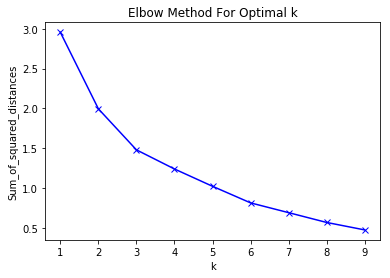

In [51]:
desmoines_grouped_clustering = desmoines_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(desmoines_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The major drop of the change in tension occurs after 3 clusters in the Des Moines data. While there appears to be another drop off at cluster 6, this change is not as drastic. Thus we will proceed with 3 clusters for the Des Moines, Iowa data.

In [52]:
# set number of clusters
kclusters = 3

#desmoines_grouped_clustering = desmoines_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(desmoines_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int32)

In [53]:
# add clustering labels
desmoines_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge data to add latitude/longitude for each neighborhood
desmoines_merged = df_iowa_neighborhoods.join(desmoines_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

desmoines_merged.head()

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
2       Beaverdale  41.6202  -93.6735             0.0           Pizza Place   
4     Capitol East  41.5905  -93.6068             1.0    Mexican Restaurant   
7        Carpenter  41.6022  -93.6426             1.0    Mexican Restaurant   
8  Chautauqua Park  41.0091  -91.1323             NaN                   NaN   
9     Cheatom Park  41.5968  -93.6321             NaN                   NaN   

  2nd Most Common Venue    3rd Most Common Venue      4th Most Common Venue  \
2   American Restaurant               Restaurant                     Market   
4   American Restaurant  New American Restaurant  Middle Eastern Restaurant   
7      Greek Restaurant         Asian Restaurant                 Food Truck   
8                   NaN                      NaN                        NaN   
9                   NaN                      NaN                        NaN   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
2    Mexican Restaurant        Farmers Market  New American Restaurant   
4      Cuban Restaurant  Fast Food Restaurant               Food Truck   
7    Chinese Restaurant     Indian Restaurant           Sandwich Place   
8                   NaN                   NaN                      NaN   
9                   NaN                   NaN                      NaN   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
2   Dumpling Restaurant      Cuban Restaurant      French Restaurant  
4      Greek Restaurant       Thai Restaurant     Italian Restaurant  
7           Pizza Place           Flea Market             Food Court  
8                   NaN                   NaN                    NaN  
9                   NaN                   NaN                    NaN

In [54]:
#lets drop neighborhoods that didn't return any restaurants and were thus eliminated prior to clustering
desmoines_merged.dropna(inplace=True)
desmoines_merged.head()

Neighborhood Latitude Longitude  Cluster Labels  \
2            Beaverdale  41.6202  -93.6735             0.0   
4          Capitol East  41.5905  -93.6068             1.0   
7             Carpenter  41.6022  -93.6426             1.0   
11  Downtown Des Moines  41.5872  -93.6251             1.0   
12                Drake  40.8108  -91.1005             0.0   

   1st Most Common Venue 2nd Most Common Venue    3rd Most Common Venue  \
2            Pizza Place   American Restaurant               Restaurant   
4     Mexican Restaurant   American Restaurant  New American Restaurant   
7     Mexican Restaurant      Greek Restaurant         Asian Restaurant   
11           Pizza Place    Italian Restaurant      American Restaurant   
12           Pizza Place   American Restaurant       Italian Restaurant   

        4th Most Common Venue     5th Most Common Venue  \
2                      Market        Mexican Restaurant   
4   Middle Eastern Restaurant          Cuban Restaurant   
7                  Food Truck        Chinese Restaurant   
11           Sushi Restaurant  Mediterranean Restaurant   
12         Mexican Restaurant               Flea Market   

        6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
2              Farmers Market  New American Restaurant   Dumpling Restaurant   
4        Fast Food Restaurant               Food Truck      Greek Restaurant   
7           Indian Restaurant           Sandwich Place           Pizza Place   
11  Cajun / Creole Restaurant         Cuban Restaurant        Farmers Market   
12                 Food Truck               Food Court     Food & Drink Shop   

   9th Most Common Venue 10th Most Common Venue  
2       Cuban Restaurant      French Restaurant  
4        Thai Restaurant     Italian Restaurant  
7            Flea Market             Food Court  
11     German Restaurant        Thai Restaurant  
12                  Food   Fast Food Restaurant

In [55]:
# create map of Des Moines clusters
desmoines_clusters = folium.Map(location=[des_latitude, des_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(desmoines_merged['Latitude'], desmoines_merged['Longitude'], desmoines_merged['Neighborhood'], desmoines_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(desmoines_clusters)
       
desmoines_clusters

## Examine the cluster created in Des Moines

Cluster 0 identifies neighborhoods that are very cosmopolitan thus a lot of immigrants will find a comfortable home in these neighborhoods. It is also interesting to note that a lot more south americans are represented in these communities compared to what we observed in baltimore

In [81]:
#examine cluster 0
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 0, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
4                 Capitol East  41.5905  -93.6068             0.0   
7                    Carpenter  41.6022  -93.6426             0.0   
11         Downtown Des Moines  41.5872  -93.6251             0.0   
13                  Drake Park  41.5971  -93.6489             0.0   
14                East Village  41.5899  -93.6128             0.0   
17                Frisbie Park  41.5748  -93.7005             0.0   
18                 Garton West   41.605  -93.5738             0.0   
25                 Jordan Park  41.5316  -93.6043             0.0   
32  Martin Luther King Jr Park  41.6037  -93.5924             0.0   
34                    Meredith  41.6447  -93.6946             0.0   
35                   Merle Hay  41.6317  -93.7013             0.0   
41              Salisbury Oaks  41.5798  -93.6716             0.0   
42                Sherman Hill  41.5916  -93.6412             0.0   
44                  South Park  41.5911  -93.6037             0.0   

   1st Most Common Venue  2nd Most Common Venue    3rd Most Common Venue  \
4     Mexican Restaurant    American Restaurant  New American Restaurant   
7     Mexican Restaurant      Indian Restaurant           Sandwich Place   
11    Italian Restaurant            Pizza Place      American Restaurant   
13            Food Truck     Mexican Restaurant        Indian Restaurant   
14   American Restaurant       Sushi Restaurant       Italian Restaurant   
17    Mexican Restaurant            Pizza Place           Sandwich Place   
18  Fast Food Restaurant            Pizza Place           Sandwich Place   
25  Fast Food Restaurant            Pizza Place       Mexican Restaurant   
32         Grocery Store     Mexican Restaurant          Thai Restaurant   
34  Fast Food Restaurant    American Restaurant                     Food   
35      Asian Restaurant     Chinese Restaurant     Fast Food Restaurant   
41     French Restaurant     Mexican Restaurant           Sandwich Place   
42        Sandwich Place  Vietnamese Restaurant              Pizza Place   
44    Mexican Restaurant    American Restaurant           Sandwich Place   

   4th Most Common Venue          5th Most Common Venue  \
4            Pizza Place               Greek Restaurant   
7             Food Truck               Greek Restaurant   
11      Sushi Restaurant       Mediterranean Restaurant   
13        Sandwich Place               Greek Restaurant   
14           Pizza Place        New American Restaurant   
17  Fast Food Restaurant  Vegetarian / Vegan Restaurant   
18    Italian Restaurant                  Grocery Store   
25        Sandwich Place            American Restaurant   
32      Asian Restaurant                     Food Truck   
34      Asian Restaurant             Chinese Restaurant   
35        Sandwich Place            American Restaurant   
41                  Food          Vietnamese Restaurant   
42            Food Truck                  Grocery Store   
44    Italian Restaurant                     Restaurant   

      6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
4      Fast Food Restaurant        Italian Restaurant      Cuban Restaurant   
7        Chinese Restaurant          Asian Restaurant      Cuban Restaurant   
11           Farmers Market         German Restaurant      Cuban Restaurant   
13              Pizza Place        Chinese Restaurant      Sushi Restaurant   
14       Mexican Restaurant         German Restaurant      Greek Restaurant   
17           Farmers Market       American Restaurant    Chinese Restaurant   
18       Chinese Restaurant          Cuban Restaurant   Dumpling Restaurant   
25       Chinese Restaurant               Flea Market    Italian Restaurant   
32           Sandwich Place      Fast Food Restaurant     German Restaurant   
34       Seafood Restaurant            Sandwich Place     German Restaurant   
35       Mexican Restaurant                Food Court            Restaurant   
41     

cluster 1 identifies a neighborhood, Union Park, which appears to be a predominantly immigrant community

In [82]:
#examine cluster 1
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 1, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
46   Union Park  41.6123  -93.6089             1.0            Food Truck   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
46  Vietnamese Restaurant           Flea Market      Greek Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
46     German Restaurant     French Restaurant            Food Court   

   8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  
46                  Food  Fast Food Restaurant  Vegetarian / Vegan Restaurant

Cluster 2 identifies neighborhoods that are predominantly american in composition. However the presence of other nationalities in the top five places indicates a fairly diverse community.

In [83]:
#examine cluster 2
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 2, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
2      Beaverdale  41.6202  -93.6735             2.0   American Restaurant   
12          Drake  40.8108  -91.1005             2.0           Pizza Place   
16  Fairmont Park  41.6229  -93.5693             2.0           Pizza Place   
30   Lower Beaver  41.6337  -93.6646             2.0           Pizza Place   
48      Waterbury  41.5873  -93.6939             2.0           Pizza Place   

   2nd Most Common Venue    3rd Most Common Venue  \
2            Pizza Place  New American Restaurant   
12    Italian Restaurant       Mexican Restaurant   
16   American Restaurant       Chinese Restaurant   
30    Chinese Restaurant    Vietnamese Restaurant   
48  Fast Food Restaurant       Mexican Restaurant   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
2                  Farmers Market                Market    Mexican Restaurant   
12               Greek Restaurant     French Restaurant            Food Truck   
16                  Grocery Store           Flea Market     German Restaurant   
30              German Restaurant     French Restaurant            Food Truck   
48  Vegetarian / Vegan Restaurant    Chinese Restaurant      Cuban Restaurant   

   7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
2            Flea Market     French Restaurant                 Food Truck   
12            Food Court                  Food                Flea Market   
16     French Restaurant            Food Truck                 Food Court   
30            Food Court                  Food                Flea Market   
48   Dumpling Restaurant        Farmers Market  Cajun / Creole Restaurant   

   10th Most Common Venue  
2              Food Court  
12  Vietnamese Restaurant  
16                   Food  
30   Fast Food Restaurant  
48       Greek Restaurant

# Analysis of Washington DC neighborhoods

### Import DC neighborhood data

In [7]:

body = client_c9aa3a80e8314f1c91c6096da87c6720.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-wywkypk0trnoc4',Key='DC_neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_DC_neighborhoods = pd.read_csv(body)
df_DC_neighborhoods.head()



Neighborhood
0       Adams Morgan
1   Columbia Heights
2  Howard University
3           Kalorama
4       LeDroit Park

In [8]:
#get coordinates for DC neighborhoods 
latitude_lst = [] 
longitude_lst = []
neighborhood_lst = []

neighborhood_lst = df_DC_neighborhoods['Neighborhood'] 
geolocator = Nominatim(user_agent="DC_explorer")

for neighborhood in neighborhood_lst:
    address = neighborhood + ', Washington, DC'
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NA'
        longitude = 'NA'

    latitude_lst.append(latitude)
    longitude_lst.append(longitude)


df_DC_neighborhoods['Latitude']=latitude_lst
df_DC_neighborhoods['Longitude']=longitude_lst

df_DC_neighborhoods.head()


Neighborhood Latitude Longitude
0       Adams Morgan  38.9215  -77.0422
1   Columbia Heights  38.9257  -77.0294
2  Howard University  38.9215  -77.0195
3           Kalorama  38.9168  -77.0525
4       LeDroit Park  38.9159  -77.0157

In [9]:
#eliminate neighborhoods for which no coordinates were returned
df_DC_neighborhoods.drop(df_DC_neighborhoods[df_DC_neighborhoods.Latitude == 'NA'].index, inplace=True)
df_DC_neighborhoods.drop(df_DC_neighborhoods[df_DC_neighborhoods.Longitude == 'NA'].index, inplace=True)
df_DC_neighborhoods.head(10)

Neighborhood Latitude Longitude
0        Adams Morgan  38.9215  -77.0422
1    Columbia Heights  38.9257  -77.0294
2   Howard University  38.9215  -77.0195
3            Kalorama  38.9168  -77.0525
4        LeDroit Park  38.9159  -77.0157
5      Mount Pleasant  38.9307  -77.0408
6           Park View  38.9335  -77.0213
7     Pleasant Plains  38.9294  -77.0228
8                Shaw  38.9098  -77.0296
10           Burleith   38.915  -77.0743

In [10]:
#check the size of the DC neighborhoods returned
df_DC_neighborhoods.shape

(130, 3)

In [13]:
df_DC_neighborhoods = df_DC_neighborhoods.head(100)

In [14]:
#call the getNearbyVenues to get data from foursquare
DC_venues = getNearbyVenues(names=df_DC_neighborhoods['Neighborhood'],
                                   latitudes=df_DC_neighborhoods['Latitude'],
                                   longitudes=df_DC_neighborhoods['Longitude']
                                  )

DC_venues.head()

Adams Morgan 38.9215002 -77.0421992
Columbia Heights 38.9256724 -77.0294287
Howard University 38.921525 -77.019535656678
Kalorama 38.9167781 -77.0524773
LeDroit Park 38.9159068 -77.0157211
Mount Pleasant 38.9306668 -77.0408103
Park View 38.9334691 -77.0213014
Pleasant Plains 38.92940685 -77.0228340911603
Shaw 38.9097778 -77.0296259
Burleith 38.915027 -77.074319354395
Chinatown 38.8998025 -77.0209889
Downtown 38.9003966 -77.0282586007529
Dupont Circle 38.9109436 -77.0427259
Federal Triangle 38.8934583 -77.0280297
Foggy Bottom 38.902015 -77.0526041
Georgetown 38.9051994 -77.062785
Logan Circle 38.9097778 -77.0296259
Mount Vernon Square 38.90253095 -77.0229479427599
Penn Quarter 38.8958959 -77.022268
Shaw 38.9097778 -77.0296259
Sheridan Kalorama 38.9121235 -77.0506498136241
West End 38.907056 -77.0496994
American University Park 38.9514996 -77.0899781
Berkley 38.952072 -77.098358
Cathedral Heights 38.93457825 -77.0821899818109
Chevy Chase 38.9714068 -77.0542549
Cleveland Park 38.9352305 -

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Adams Morgan                38.9215              -77.042199   
1  Adams Morgan                38.9215              -77.042199   
2  Adams Morgan                38.9215              -77.042199   
3  Adams Morgan                38.9215              -77.042199   
4  Adams Morgan                38.9215              -77.042199   

            Venue  Venue Latitude  Venue Longitude            Venue Category  
0           Lapis       38.921302       -77.043890         Afghan Restaurant  
1    Tail Up Goat       38.923422       -77.043214  Mediterranean Restaurant  
2         Donburi       38.921673       -77.042385       Japanese Restaurant  
3  Smoke & Barrel       38.922266       -77.042286                 BBQ Joint  
4           Tryst       38.921916       -77.042329               Coffee Shop

In [15]:
#select for restaurants and grocery shops from the venues returned from foursquare

# select restaurants and grocery shops.
DC_data = DC_venues[DC_venues['Venue Category'].str.contains('Farmers|Market|Restaurant|Pizza|Food|Sandwich|Grocery|BBQ', na=False, regex=True)].reset_index(drop=True)
DC_data.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Adams Morgan                38.9215              -77.042199   
1  Adams Morgan                38.9215              -77.042199   
2  Adams Morgan                38.9215              -77.042199   
3  Adams Morgan                38.9215              -77.042199   
4  Adams Morgan                38.9215              -77.042199   

                   Venue  Venue Latitude  Venue Longitude  \
0                  Lapis       38.921302       -77.043890   
1           Tail Up Goat       38.923422       -77.043214   
2                Donburi       38.921673       -77.042385   
3         Smoke & Barrel       38.922266       -77.042286   
4  Amsterdam Falafelshop       38.921162       -77.041959   

             Venue Category  
0         Afghan Restaurant  
1  Mediterranean Restaurant  
2       Japanese Restaurant  
3                 BBQ Joint  
4        Falafel Restaurant

In [16]:
#drop duplicates venues if they exist in the data set. This is because some of the neighborhoods are really close and venues may overlap.
DC_data_unique = DC_data.drop_duplicates()
DC_data_unique.shape

(1801, 7)

In [17]:
#check how many venues were returned for each neighborhood
DC_data_unique.groupby('Neighborhood').count()

#how many unique categories exist in our data set
print('There are {} uniques categories.'.format(len(DC_venues['Venue Category'].unique())))

There are 322 uniques categories.


In [19]:
# create map of Washington, DC using latitude and longitude values
DC_latitude = 38.889931
DC_longitude = -77.009003

map_DC = folium.Map(location=[DC_latitude, DC_longitude], zoom_start=12)

# add DC as a red circle mark
folium.features.CircleMarker(
[DC_latitude, DC_longitude],
radius=10,
popup='DC',
fill=True,
color='red',
fill_color='red',
fill_opacity=0.6
).add_to(map_DC)


# add restaurants, grocery and eating places to the map as blue circle markers
for lat, lng, label in zip(DC_data_unique['Venue Latitude'], DC_data_unique['Venue Longitude'], DC_data_unique['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(map_DC)

# display map
map_DC

# K-means clustering for DC Neighborhoods

In [20]:
# one hot encoding
DC_onehot = pd.get_dummies(DC_data_unique[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
DC_onehot['Neighborhood'] = DC_data_unique['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [DC_onehot.columns[-1]] + list(DC_onehot.columns[:-1])
DC_onehot = DC_onehot[fixed_columns]

DC_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0  Adams Morgan                  1                   0                    0   
1  Adams Morgan                  0                   0                    0   
2  Adams Morgan                  0                   0                    0   
3  Adams Morgan                  0                   0                    0   
4  Adams Morgan                  0                   0                    0   

   Arepa Restaurant  Asian Restaurant  Austrian Restaurant  BBQ Joint  \
0                 0                 0                    0          0   
1                 0                 0                    0          0   
2                 0                 0                    0          0   
3                 0                 0                    0          1   
4                 0                 0                    0          0   

   Belgian Restaurant  Brazilian Restaurant         ...           \
0                   0                     0         ...            
1                   0                     0         ...            
2                   0                     0         ...            
3                   0                     0         ...            
4                   0                     0         ...            

   Southern / Soul Food Restaurant  Spanish Restaurant  Sushi Restaurant  \
0                                0                   0                 0   
1                                0                   0                 0   
2                                0                   0                 0   
3                                0                   0                 0   
4                                0                   0                 0   

   Swiss Restaurant  Tapas Restaurant  Thai Restaurant  Turkish Restaurant  \
0                 0                 0                0                   0   
1                 0                 0                0                   0   
2                 0                 0                0                   0   
3                 0                 0                0                   0   
4                 0                 0                0                   0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Xinjiang Restaurant  
0                              0                      0                    0  
1                              0                      0                    0  
2                              0                      0                    0  
3                              0                      0                    0  
4                              0                      0                    0  

[5 rows x 71 columns]

In [21]:
DC_onehot.shape

(1801, 71)

In [22]:
DC_grouped = DC_onehot.groupby('Neighborhood').mean().reset_index()
DC_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0               Adams Morgan           0.027778            0.000000   
1   American University Park           0.000000            0.000000   
2                  Arboretum           0.000000            0.166667   
3              Barnaby Woods           0.000000            0.000000   
4                    Benning           0.000000            0.000000   
5            Benning Heights           0.000000            0.000000   
6              Benning Ridge           0.000000            0.000000   
7                    Berkley           0.000000            0.000000   
8               Bloomingdale           0.000000            0.000000   
9                  Brentwood           0.000000            0.000000   
10                Brightwood           0.000000            0.000000   
11           Brightwood Park           0.000000            0.000000   
12                 Brookland           0.000000            0.000000   
13                  Burleith           0.000000            0.000000   
14                 Burrville           0.000000            0.000000   
15              Capitol Hill           0.000000            0.000000   
16              Capitol View           0.000000            0.000000   
17           Carver Langston           0.000000            0.000000   
18         Cathedral Heights           0.000000            0.000000   
19         Central Northeast           0.000000            0.000000   
20               Chevy Chase           0.000000            0.000000   
21                 Chinatown           0.000000            0.000000   
22          Civic Betterment           0.000000            0.000000   
23            Cleveland Park           0.000000            0.000000   
24          Colonial Village           0.000000            0.000000   
25               Colony Hill           0.000000            0.000000   
26          Columbia Heights           0.000000            0.000000   
27                 Crestwood           0.000000            0.000000   
28                  Deanwood           0.000000            0.000000   
29                  Downtown           0.000000            0.000000   
..                       ...                ...                 ...   
63                 Navy Yard           0.000000            0.000000   
64            Near Northeast           0.000000            0.000000   
65                      NoMa           0.000000            0.000000   
66      North Cleveland Park           0.000000            0.032258   
67       North Michigan Park           0.000000            0.000000   
68                 Park View           0.000000            0.000000   
69              Penn Quarter           0.000000            0.000000   
70                  Petworth           0.000000            0.000000   
71             Pleasant Hill           0.000000            0.000000   
72           Pleasant Plains           0.000000            0.000000   
73           Potomac Heights           0.000000            0.000000   
74             Queens Chapel           0.000000            0.000000   
75                Riggs Park           0.000000            0.000000   
76                      Shaw           0.000000            0.000000   
77             Shepherd Park           0.000000            0.000000   
78         Sheridan Kalorama           0.000000            0.000000   
79  Sixteenth Street Heights           0.000000            0.000000   
80      Southwest Waterfront           0.000000            0.000000   
81             Spring Valley           0.000000            0.000000   
82                Stronghold           0.000000            0.000000   
83                    Takoma           0.000000            0.000000   
84                Tenleytown           0.000000            0.040000   
85             The Palisades           0.000000            0.000000   
86                  Trinidad           0.000000            0.000000   
87            Truxton Circle           0

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
DC_venues_sorted = pd.DataFrame(columns=columns)
DC_venues_sorted['Neighborhood'] = DC_grouped['Neighborhood']

for ind in np.arange(DC_grouped.shape[0]):
    DC_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DC_grouped.iloc[ind, :], num_top_venues)

DC_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0              Adams Morgan         Grocery Store  Ethiopian Restaurant   
1  American University Park           Pizza Place         Grocery Store   
2                 Arboretum    African Restaurant   American Restaurant   
3             Barnaby Woods             BBQ Joint   Xinjiang Restaurant   
4                   Benning           Pizza Place  Fast Food Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place             BBQ Joint      Sushi Restaurant   
1    Seafood Restaurant     French Restaurant     Indian Restaurant   
2       Organic Grocery      Asian Restaurant  Fast Food Restaurant   
3           Flea Market  Ethiopian Restaurant    Falafel Restaurant   
4            Food Truck            Restaurant        Sandwich Place   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0      Asian Restaurant  New American Restaurant    Italian Restaurant   
1  Fast Food Restaurant       Italian Restaurant     Korean Restaurant   
2    Chinese Restaurant      Xinjiang Restaurant           Flea Market   
3        Farmers Market     Fast Food Restaurant   Filipino Restaurant   
4   Empanada Restaurant       English Restaurant  Ethiopian Restaurant   

      9th Most Common Venue 10th Most Common Venue  
0  Mediterranean Restaurant   Brazilian Restaurant  
1                    Market     Mexican Restaurant  
2            Farmers Market    Filipino Restaurant  
3               Fish Market                   Food  
4        Falafel Restaurant         Farmers Market

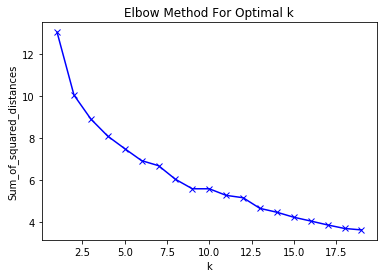

In [25]:
DC_grouped_clustering = DC_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(DC_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [26]:
# set number of clusters
kclusters = 8

#DC_grouped_clustering = DC_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 6, 5, 1, 7, 7, 5, 6, 6, 0], dtype=int32)

In [27]:
# add clustering labels
DC_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge data to add latitude/longitude for each neighborhood
DC_merged = df_DC_neighborhoods.join(DC_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

DC_merged.head()

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
0       Adams Morgan  38.9215  -77.0422             6.0         Grocery Store   
1   Columbia Heights  38.9257  -77.0294             6.0           Pizza Place   
2  Howard University  38.9215  -77.0195             6.0       Thai Restaurant   
3           Kalorama  38.9168  -77.0525             6.0    Italian Restaurant   
4       LeDroit Park  38.9159  -77.0157             6.0       Thai Restaurant   

             2nd Most Common Venue            3rd Most Common Venue  \
0             Ethiopian Restaurant                      Pizza Place   
1  Southern / Soul Food Restaurant                 Asian Restaurant   
2               Italian Restaurant  Southern / Soul Food Restaurant   
3         Mediterranean Restaurant             Ethiopian Restaurant   
4                 Asian Restaurant                    Grocery Store   

      4th Most Common Venue      5th Most Common Venue 6th Most Common Venue  \
0                 BBQ Joint           Sushi Restaurant      Asian Restaurant   
1         Indian Restaurant       Ethiopian Restaurant             BBQ Joint   
2      Ethiopian Restaurant             Sandwich Place           Pizza Place   
3          Sushi Restaurant  Middle Eastern Restaurant           Pizza Place   
4  Mediterranean Restaurant    New American Restaurant    Italian Restaurant   

             7th Most Common Venue  8th Most Common Venue  \
0          New American Restaurant     Italian Restaurant   
1               Italian Restaurant             Restaurant   
2         Mediterranean Restaurant          Grocery Store   
3                    Grocery Store  Portuguese Restaurant   
4  Southern / Soul Food Restaurant   Caribbean Restaurant   

         9th Most Common Venue     10th Most Common Venue  
0     Mediterranean Restaurant       Brazilian Restaurant  
1     Mediterranean Restaurant        American Restaurant  
2  Eastern European Restaurant    New American Restaurant  
3             Asian Restaurant  Cajun / Creole Restaurant  
4                    BBQ Joint             Sandwich Place

In [28]:
DC_merged.shape

(100, 14)

In [29]:
DC_merged.dropna(inplace=True)
DC_merged.shape

(98, 14)

In [30]:
# create map
DC_map_clusters = folium.Map(location=[DC_latitude, DC_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(DC_merged['Latitude'], DC_merged['Longitude'], DC_merged['Neighborhood'], DC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(DC_map_clusters)
     
DC_map_clusters

# Examine the DC neighborhood clusters

Cluster 0 is a traditional american neighborhood with some African immigrants.

In [31]:
#examine clusters 0
DC_merged.loc[DC_merged['Cluster Labels'] == 0, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
60   Sixteenth Street Heights  38.9548  -77.0372             0.0   
64                  Brentwood  38.9432  -76.9566             0.0   
104               East Corner  38.8309  -77.0051             0.0   

    1st Most Common Venue            2nd Most Common Venue  \
60            Pizza Place              Xinjiang Restaurant   
64          Grocery Store  Southern / Soul Food Restaurant   
104         Grocery Store                      Pizza Place   

    3rd Most Common Venue          4th Most Common Venue  \
60            Fish Market             English Restaurant   
64            Pizza Place  Vegetarian / Vegan Restaurant   
104           Fish Market             English Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
60   Ethiopian Restaurant    Falafel Restaurant        Farmers Market   
64     African Restaurant           Fish Market    English Restaurant   
104  Ethiopian Restaurant    Falafel Restaurant        Farmers Market   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
60   Fast Food Restaurant   Filipino Restaurant            Flea Market  
64   Ethiopian Restaurant    Falafel Restaurant         Farmers Market  
104  Fast Food Restaurant   Filipino Restaurant            Flea Market

cluster 1 identifies more diverse neighborhoods with natural born Americans, African and Asian immigrants

In [32]:
#examine clusters 1
DC_merged.loc[DC_merged['Cluster Labels'] == 1, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
28      Chevy Chase  38.9714  -77.0543             1.0             BBQ Joint   
41  Potomac Heights  38.6041   -77.138             1.0             BBQ Joint   
48    Barnaby Woods  38.9748  -77.0597             1.0             BBQ Joint   
51      Chevy Chase  38.9714  -77.0543             1.0             BBQ Joint   
55        Hawthorne  38.9804  -77.0547             1.0             BBQ Joint   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
28   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   
41     Food & Drink Shop    Seafood Restaurant   Xinjiang Restaurant   
48   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   
51   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   
55   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
28    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
41           Fish Market  Ethiopian Restaurant    Falafel Restaurant   
48    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
51    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
55    Falafel Restaurant        Farmers Market  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
28   Filipino Restaurant           Fish Market                   Food  
41        Farmers Market  Fast Food Restaurant    Filipino Restaurant  
48   Filipino Restaurant           Fish Market                   Food  
51   Filipino Restaurant           Fish Market                   Food  
55   Filipino Restaurant           Fish Market                   Food

cluster 2 identifies neighborhoods that is more traditional american.

In [33]:
#examine clusters 2
DC_merged.loc[DC_merged['Cluster Labels'] == 2, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
45       Wesley Heights  38.9312   -77.088             2.0   
68             Edgewood  38.9226  -77.0005             2.0   
75  North Michigan Park  38.9466  -76.9834             2.0   
79           Stronghold  38.9251  -77.0081             2.0   
86         Kingman Park   38.898  -76.9749             2.0   

   1st Most Common Venue 2nd Most Common Venue  \
45         Grocery Store   American Restaurant   
68        Sandwich Place         Grocery Store   
75         Grocery Store  Fast Food Restaurant   
79         Grocery Store            Food Truck   
86         Grocery Store        Sandwich Place   

              3rd Most Common Venue 4th Most Common Venue  \
45               Italian Restaurant            Restaurant   
68  Southern / Soul Food Restaurant            Food Court   
75                             Food     German Restaurant   
79                   Sandwich Place   Peruvian Restaurant   
86             Fast Food Restaurant           Pizza Place   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
45        Farmers Market        Sandwich Place   Filipino Restaurant   
68    Italian Restaurant  Fast Food Restaurant    Mexican Restaurant   
75     French Restaurant            Food Truck            Food Court   
79   Filipino Restaurant    English Restaurant  Ethiopian Restaurant   
86   American Restaurant        Farmers Market      Arepa Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
45  Ethiopian Restaurant    Falafel Restaurant   Fast Food Restaurant  
68           Pizza Place    Chinese Restaurant    Peruvian Restaurant  
75     Food & Drink Shop   Empanada Restaurant            Flea Market  
79    Falafel Restaurant        Farmers Market   Fast Food Restaurant  
86    English Restaurant     German Restaurant      French Restaurant

cluster 3 identifies a single neighborhood, Carver Langston, while not very diverse it features Asian, European and Ethiopian immigrants.

In [34]:
#examine clusters 3
DC_merged.loc[DC_merged['Cluster Labels'] == 3, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
66  Carver Langston  38.8813  -76.9626             3.0            Food Truck   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
66    Seafood Restaurant   Xinjiang Restaurant   Filipino Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
66    English Restaurant  Ethiopian Restaurant    Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
66        Farmers Market  Fast Food Restaurant            Fish Market

The neighborhoods identified by cluster 4 are also more diverse, featuring Mediterranean, African and European Cuisines.

In [35]:
#examine clusters 4
DC_merged.loc[DC_merged['Cluster Labels'] == 4, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
30   Colony Hill  32.1825   74.1904             4.0   
69  Fort Lincoln  38.9279  -76.9608             4.0   
84  Capitol Hill  38.8896  -77.0094             4.0   
90          NoMa  38.9028  -77.0063             4.0   

              1st Most Common Venue     2nd Most Common Venue  \
30                           Market      Fast Food Restaurant   
69  Southern / Soul Food Restaurant  Mediterranean Restaurant   
84                       Food Truck       American Restaurant   
90                       Food Truck  Mediterranean Restaurant   

   3rd Most Common Venue          4th Most Common Venue 5th Most Common Venue  \
30             BBQ Joint                    Flea Market  Ethiopian Restaurant   
69   Empanada Restaurant           Ethiopian Restaurant    Falafel Restaurant   
84     French Restaurant       Mediterranean Restaurant    Mexican Restaurant   
90        Sandwich Place  Vegetarian / Vegan Restaurant         Grocery Store   

   6th Most Common Venue            7th Most Common Venue  \
30    Falafel Restaurant                   Farmers Market   
69        Farmers Market             Fast Food Restaurant   
84      Asian Restaurant                German Restaurant   
90     French Restaurant  Southern / Soul Food Restaurant   

   8th Most Common Venue  9th Most Common Venue  \
30   Filipino Restaurant            Fish Market   
69   Filipino Restaurant            Fish Market   
84      Sushi Restaurant            Pizza Place   
90  Ethiopian Restaurant  Portuguese Restaurant   

             10th Most Common Venue  
30              Xinjiang Restaurant  
69              Xinjiang Restaurant  
84  Southern / Soul Food Restaurant  
90                           Market

While neighborhoods in cluster 5 are very diverse, they feature larger Asian populations.

In [36]:
#examine clusters 5
DC_merged.loc[DC_merged['Cluster Labels'] == 5, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
49         Brightwood  38.9656  -77.0271             5.0   
50    Brightwood Park  38.9567   -77.028             5.0   
52   Colonial Village   38.987  -77.0417             5.0   
56         Manor Park   38.964  -77.0158             5.0   
62          Arboretum  38.9138  -76.9727             5.0   
65          Brookland  38.9328  -76.9842             5.0   
71            Gateway  38.9209  -76.9636             5.0   
73            Langdon  38.9232  -76.9739             5.0   
74      Michigan Park   38.947  -76.9936             5.0   
76      Pleasant Hill  38.9413  -77.0042             5.0   
77      Queens Chapel  38.9571  -76.9957             5.0   
82          Woodridge  38.9312  -76.9711             5.0   
96      Benning Ridge  38.8814  -76.9386             5.0   
98          Burrville  38.9015  -76.9225             5.0   
99       Capitol View  38.8907  -76.9308             5.0   
101  Civic Betterment  38.8789  -76.9295             5.0   
102          Deanwood  38.8998  -76.9301             5.0   
103       Dupont Park  38.8724   -76.964             5.0   
106   Fairfax Village  38.8625  -76.9508             5.0   
107          Fairlawn  38.8709  -76.9789             5.0   

    1st Most Common Venue 2nd Most Common Venue  \
49            Pizza Place        Sandwich Place   
50            Pizza Place    Chinese Restaurant   
52     Chinese Restaurant         Grocery Store   
56     Chinese Restaurant  Caribbean Restaurant   
62     African Restaurant   American Restaurant   
65            Pizza Place   American Restaurant   
71     Chinese Restaurant      Asian Restaurant   
73    American Restaurant  Fast Food Restaurant   
74         Sandwich Place           Pizza Place   
76         Sandwich Place           Pizza Place   
77          Grocery Store    Chinese Restaurant   
82          Grocery Store    Seafood Restaurant   
96     Seafood Restaurant   American Restaurant   
98                   Food    Chinese Restaurant   
99     Chinese Restaurant        Sandwich Place   
101    Chinese Restaurant           Pizza Place   
102    Seafood Restaurant   American Restaurant   
103    Seafood Restaurant       Thai Restaurant   
106           Pizza Place    Chinese Restaurant   
107  Fast Food Restaurant           Pizza Place   

             3rd Most Common Venue          4th Most Common Venue  \
49            Fast Food Restaurant  Vegetarian / Vegan Restaurant   
50            Caribbean Restaurant                         Market   
52             American Restaurant                    Flea Market   
56   Vegetarian / Vegan Restaurant                     Food Truck   
62                 Organic Grocery               Asian Restaurant   
65              Chinese Restaurant                  Grocery Store   
71                  Sandwich Place           Fast Food Restaurant   
73              Chinese Restaurant                  Grocery Store   
74              Seafood Restaurant            American Restaurant   
76             American Restaurant             Falafel Restaurant   
77            Fast Food Restaurant             Seafood Restaurant   
82             Japanese Restaurant             Chinese Restaurant   
96              Chinese Restaurant           Caribbean Restaurant   
98                  Sandwich Place             Seafood Restaurant   
99              Seafood Restaurant            American Restaurant   
101             Seafood Restaurant           Fast Food Restaurant   
102             Chinese Restaurant                 Sandwich Place   
103                    Pizza Place             Chinese Restaurant   
106                      BBQ Joint                    Fish Market   
107                         Market            American Restaurant   

    5th Most Common Venue            6th Most Common Venue  \
49    American Restaurant               Mexican Restaurant   
50    American Restaurant             Fast Food Restaurant   
52     Falafel Restaurant               

Cluster 6 identifies very diverse neighborhoods. While it features a lot more american cuisines, there are a lot of other cultures also represented.

In [37]:
#examine clusters 6
DC_merged.loc[DC_merged['Cluster Labels'] == 6, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
0               Adams Morgan  38.9215  -77.0422             6.0   
1           Columbia Heights  38.9257  -77.0294             6.0   
2          Howard University  38.9215  -77.0195             6.0   
3                   Kalorama  38.9168  -77.0525             6.0   
4               LeDroit Park  38.9159  -77.0157             6.0   
5             Mount Pleasant  38.9307  -77.0408             6.0   
6                  Park View  38.9335  -77.0213             6.0   
7            Pleasant Plains  38.9294  -77.0228             6.0   
8                       Shaw  38.9098  -77.0296             6.0   
10                  Burleith   38.915  -77.0743             6.0   
11                 Chinatown  38.8998   -77.021             6.0   
12                  Downtown  38.9004  -77.0283             6.0   
13             Dupont Circle  38.9109  -77.0427             6.0   
14          Federal Triangle  38.8935   -77.028             6.0   
15              Foggy Bottom   38.902  -77.0526             6.0   
16                Georgetown  38.9052  -77.0628             6.0   
17              Logan Circle  38.9098  -77.0296             6.0   
18       Mount Vernon Square  38.9025  -77.0229             6.0   
19              Penn Quarter  38.8959  -77.0223             6.0   
20                      Shaw  38.9098  -77.0296             6.0   
21         Sheridan Kalorama  38.9121  -77.0506             6.0   
24                  West End  38.9071  -77.0497             6.0   
25  American University Park  38.9515    -77.09             6.0   
26                   Berkley  38.9521  -77.0984             6.0   
27         Cathedral Heights  38.9346  -77.0822             6.0   
29            Cleveland Park  38.9352  -77.0587             6.0   
31              Forest Hills  38.9509   -77.058             6.0   
33        Friendship Heights  38.9598   -77.085             6.0   
34               Glover Park  38.9209  -77.0772             6.0   
35                      Kent  38.9032  -76.9934             6.0   
36     Massachusetts Heights  38.9255  -77.0707             6.0   
37            McLean Gardens  38.9373  -77.0753             6.0   
38      North Cleveland Park  38.9501  -77.0705             6.0   
40             The Palisades  38.9251  -77.1014             6.0   
42             Spring Valley  38.9396  -77.0989             6.0   
43                Tenleytown  38.9489  -77.0803             6.0   
46      Woodland Normanstone  38.9237  -77.0615             6.0   
47              Woodley Park  38.9252  -77.0528             6.0   
53                 Crestwood  38.9418  -77.0405             6.0   
57                  Petworth  38.9459   -77.025             6.0   
58                Riggs Park  38.9744  -77.0122             6.0   
59             Shepherd Park  38.9797  -77.0318             6.0   
61                    Takoma  38.9751  -77.0172             6.0   
63              Bloomingdale  38.9168  -77.0114             6.0   
67                 Eckington  38.9147  -77.0066             6.0   
72                  Ivy City  38.9121  -76.9869             6.0   
78                Riggs Park  38.9744  -77.0122             6.0   
80                  Trinidad  38.9057  -76.9844             6.0   
81            Truxton Circle  38.9098   -77.015             6.0   
85          Judiciary Square  38.8968  -77.0176             6.0   
88                 Navy Yard  38.8763  -77.0005             6.0   
89            Near Northeast   38.903  -76.9999             6.0   
91                      Shaw  38.9098  -77.0296             6.0   
92      Southwest Waterfront   38.879  -77.0222             6.0   

       1st Most Common Venue            2nd Most Common Venue  \
0              Grocery Store             Ethiopian Restaurant   
1                Pizza Place  Southern / Soul Food Restaurant   
2            Thai Restaurant               Italian Restaurant   
3         Italian Restaurant         Mediterranean Restaurant   
4    

Cluster 7 identifies neighborhoods that are very traditional american fare. while there are some eastern european, ethiopian and mediterranean cuisine, their prevalence is not as much as traditional american eateries.

In [38]:
#examine clusters 7
DC_merged.loc[DC_merged['Cluster Labels'] == 7, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
32             Foxhall  38.9118  -77.0844             7.0   
54         Fort Totten  38.9518  -77.0022             7.0   
70         Fort Totten  38.9518  -77.0022             7.0   
95     Benning Heights  38.8935  -76.9508             7.0   
97             Benning  38.8935  -76.9508             7.0   
100  Central Northeast  38.8961  -76.9411             7.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
32         Sandwich Place            Restaurant            Food Court   
54   Fast Food Restaurant         Grocery Store        Sandwich Place   
70   Fast Food Restaurant         Grocery Store        Sandwich Place   
95            Pizza Place  Fast Food Restaurant            Food Truck   
97            Pizza Place  Fast Food Restaurant            Food Truck   
100        Sandwich Place           Pizza Place    Seafood Restaurant   

           4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
32          Fast Food Restaurant   Xinjiang Restaurant   Filipino Restaurant   
54   Eastern European Restaurant    English Restaurant  Ethiopian Restaurant   
70   Eastern European Restaurant    English Restaurant  Ethiopian Restaurant   
95                    Restaurant        Sandwich Place   Empanada Restaurant   
97                    Restaurant        Sandwich Place   Empanada Restaurant   
100          American Restaurant            Restaurant  Fast Food Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
32     English Restaurant  Ethiopian Restaurant    Falafel Restaurant   
54     Falafel Restaurant        Farmers Market   Filipino Restaurant   
70     Falafel Restaurant        Farmers Market   Filipino Restaurant   
95     English Restaurant  Ethiopian Restaurant    Falafel Restaurant   
97     English Restaurant  Ethiopian Restaurant    Falafel Restaurant   
100    English Restaurant  Ethiopian Restaurant    Falafel Restaurant   

    10th Most Common Venue  
32          Farmers Market  
54             Fish Market  
70             Fish Market  
95          Farmers Market  
97          Farmers Market  
100         Farmers Market